In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")

In [3]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

In [4]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

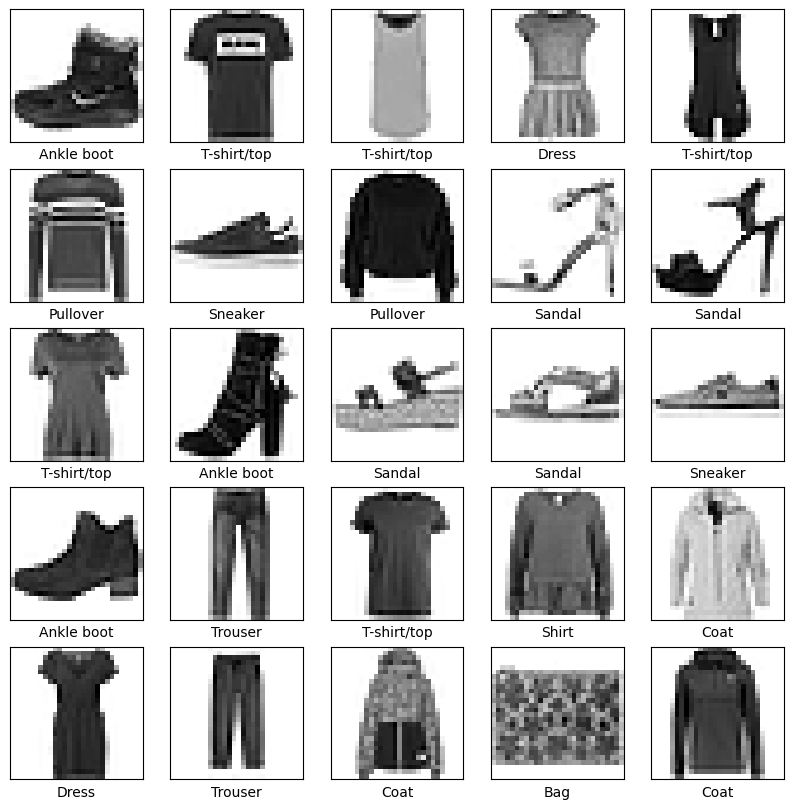

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(len(class_names), activation="softmax", name="output-layer")
])

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.5871 - loss: 1.3674 - val_accuracy: 0.7219 - val_loss: 0.7470
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8013 - loss: 0.5725 - val_accuracy: 0.8139 - val_loss: 0.5547
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8242 - loss: 0.4994 - val_accuracy: 0.8270 - val_loss: 0.4976
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8387 - loss: 0.4559 - val_accuracy: 0.8439 - val_loss: 0.4651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8491 - loss: 0.4301 - val_accuracy: 0.8446 - val_loss: 0.4417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8607 - loss: 0.3974 - val_accuracy: 0.8547 - val_loss: 0.4205
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8628 - loss: 0.3860 - val_accuracy: 0.8481 - val_loss: 0.4412
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8642 -

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv-layer-1 (Conv2D)           │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-1                 │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-layer-2 (Conv2D)           │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-2                 │ (None, 7, 7, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-3                 │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,870 (151.84 KB)

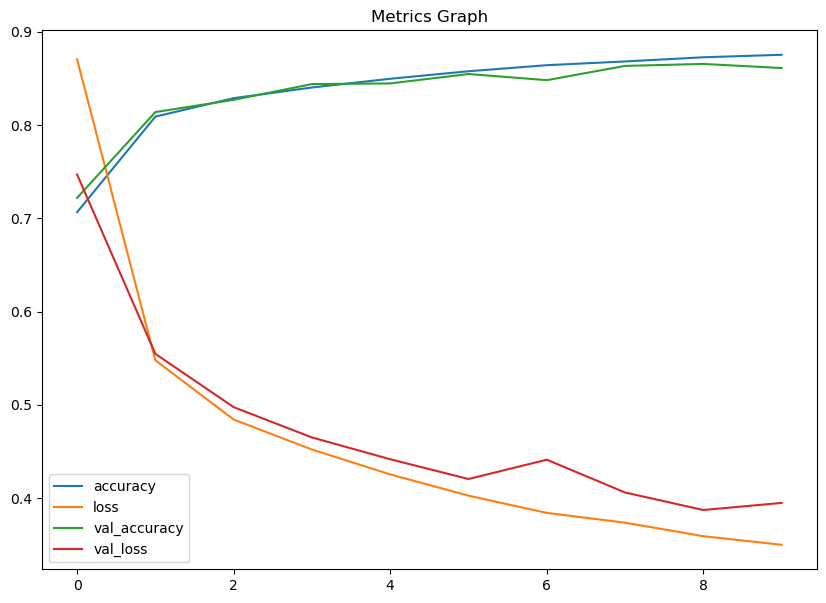

In [11]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [12]:
model.evaluate(testX, testY_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8634 - loss: 0.3885


[0.394924134016037, 0.8611000180244446]

In [13]:
predictions = model.predict(testX)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [14]:
predictions = tf.argmax(predictions, axis=1)

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [16]:
model.evaluate(testX, testY_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8634 - loss: 0.3885


[0.394924134016037, 0.8611000180244446]

In [17]:
predictions = model.predict(testX)
predictions = tf.argmax(predictions, axis=1)
y_test = tf.argmax(testY_cat, axis=1)
y_test = tf.Variable(y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [18]:
print("Accuracy: ",metrics.accuracy_score(y_test, predictions))

Accuracy:  0.8611


In [19]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.85      0.80      1000
           3       0.79      0.91      0.85      1000
           4       0.91      0.52      0.67      1000
           5       0.97      0.97      0.97      1000
           6       0.60      0.71      0.65      1000
           7       0.95      0.94      0.94      1000
           8       0.95      0.98      0.96      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



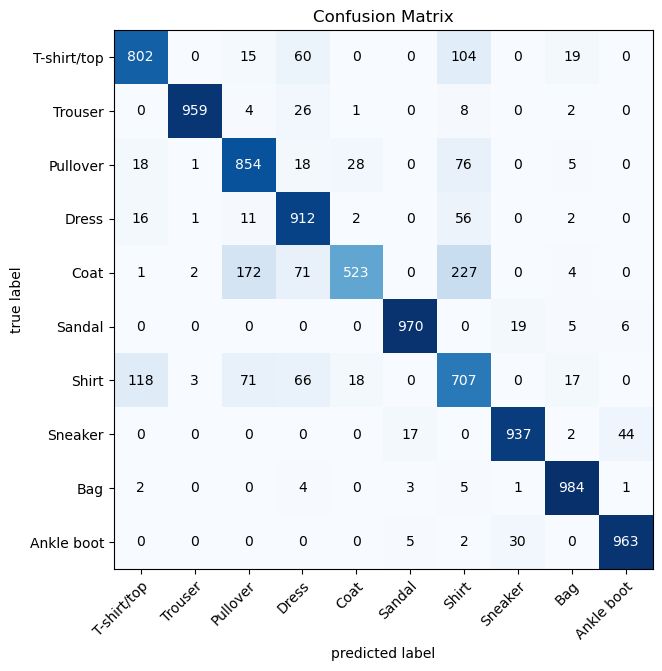

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


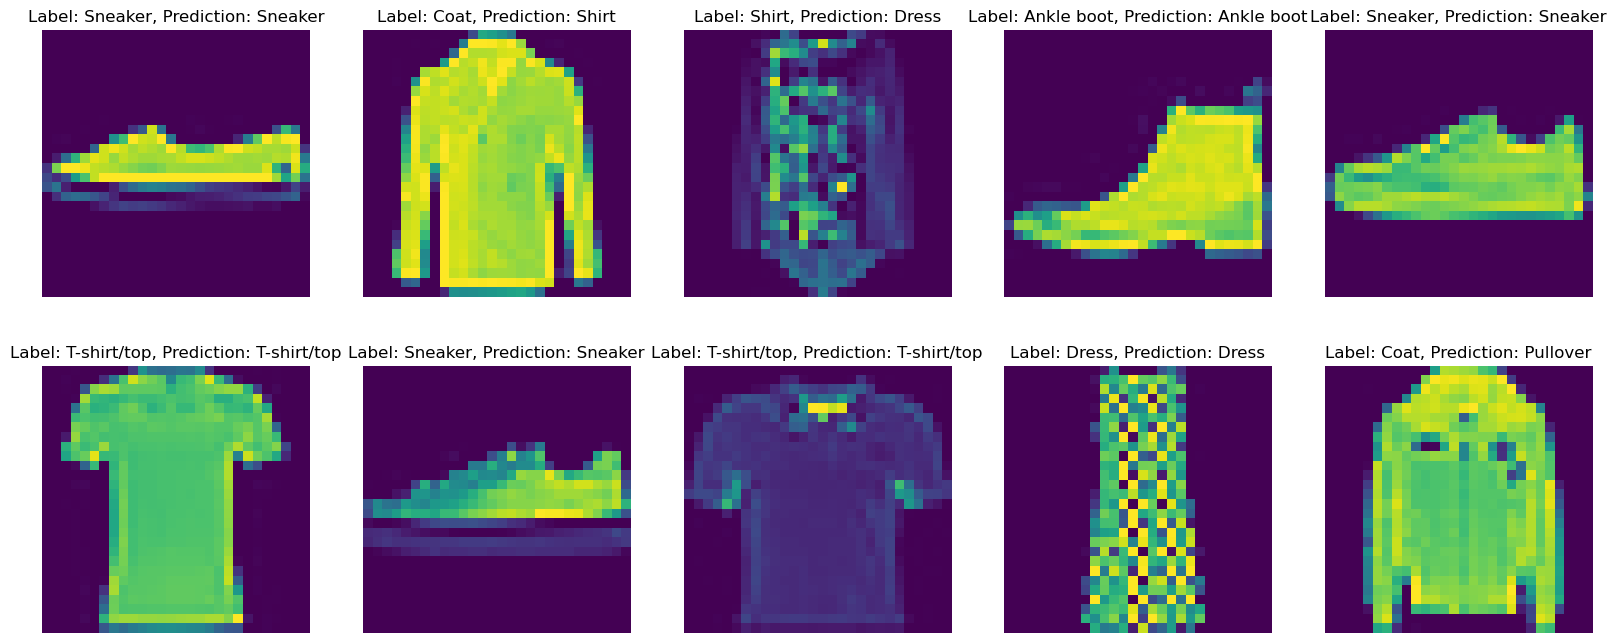

In [21]:
images = []
labels = []
random_indices = random.sample(range(len(testX)), 10)
for idx in random_indices:
    images.append(testX[idx])
    labels.append(testY_cat[idx])
images = np.array(images)
labels = np.array(labels)

fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1